# Entrega 1: Exploración de datos

Para el presente proyecto se tomaron los datos de la página de la DIAN. Se utilizaron los últimos datos disponibles (2022).

En el siguiente link se encuentra el diccionario de dichos datos:https://microdatos.dane.gov.co/index.php/catalog/804/data-dictionary/F16?file_name=Personas 

Este notebook busca realizar una exploración inicial de la base para así utilizar técnicas de Aprendizaje No Supervisado para generar grupos de clases sociales y compararlos con los generados por la DIAN. 

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura de datos

Descargamos una muestra del dataset en la carpeta data. Vamos a empezar a explorarlo

In [37]:
personas_data = pd.read_csv('data/nivel_pobreza_personas.csv', index_col='Unnamed: 0')
personas_data.head()

,directorio,secuencia_p,orden,clase,dominio,mes,p3271,p6040,p6050,p6090,...,iof2es,iof3hes,iof3ies,iof6es,ingtotob,ingtotes,ingtot,fex_c,dpto,fex_dpto
1,5000000.0,1,1,1,RESTO URBANO,1,1,33,1,2,...,NaN,NaN,NaN,NaN,768000.0,NaN,768000.0,119.371944,8,189.039972
2,5000000.0,1,2,1,RESTO URBANO,1,2,31,2,2,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,119.371944,8,189.039972
3,5000000.0,1,3,1,RESTO URBANO,1,2,11,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972
4,5000000.0,1,4,1,RESTO URBANO,1,2,5,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972
5,5000000.0,1,5,1,RESTO URBANO,1,1,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.371944,8,189.039972


In [38]:
personas_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240001 entries, 1 to 240001
Columns: 132 entries, directorio to fex_dpto
dtypes: float64(122), int64(9), object(1)
memory usage: 243.5+ MB


### Análisis

- Estamos tratando con una muestra el dataset del reporte de 2022 para Medición de pobreza monetaria y desigualdad del 2022.

- Tenemos inicialmente 132 columnas y 2400.001 registros.

- Podemos observar algunos datos nulos. Se decide proceder con el análisis para tomar decisiones sobre su importancia. 

## Descripción datos

Para las 132 columnas tenemos las siguientes descripciones según el diccionario de datos de la DIAN:

| Variable       | Descripción                                                                                                                                                                        |
|:---------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| directorio     | Directorio                                                                                                                                                                         |
| llave_vivienda | Llave de vivienda                                                                                                                                                                  |
| secuencia_p    | Secuencia_p                                                                                                                                                                        |
| llave_hogar    | Llave de hogar                                                                                                                                                                     |
| orden          | Orden                                                                                                                                                                              |
| llave_persona  | Llave de persona                                                                                                                                                                   |
| clase          | 1. Cabecera, 2. Resto (centros poblados y área rural dispersa)                                                                                                                     |
| dominio        | Dominio                                                                                                                                                                            |
| mes            | Mes                                                                                                                                                                                |
| p3271          | Sexo                                                                                                                                                                               |
| p6040          | ¿Cuántos años cumplidos tiene?                                                                                                                                                     |
| p6050          | ¿Cuál es el parentesco de ...Con el jefe o jefa del hogar?                                                                                                                         |
| p6090          | ¿... Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?                                                                                 |
| p6100          | ¿A cuál de los siguientes regímenes de seguridad social en salud está afiliado?                                                                                                    |
| p3042          | ¿Cuál es el nivel educativo más alto alcanzado por .... y el último año o grado aprobado en este nivel?                                                                            |
| p3042s1        | Grado                                                                                                                                                                              |
| p3043          | Título o diploma de mayor nivel educativo                                                                                                                                          |
| p6240          | ¿En qué actividad ocupó la mayor parte del tiempo la semana pasada?                                                                                                                |
| p6426          | ¿Cuánto tiempo lleva trabajando en esta empresa, negocio, industria, oficina, firma o finca de manera continua?                                                                    |
| p6430          | En este trabajo es (posición ocupacional primera actividad)                                                                                                                        |
| p6500          | Antes de descuentos ¿cuánto ganó el mes pasado en este empleo?                                                                                                                     |
| p6510          | ¿El mes pasado recibió ingresos por concepto de horas extras?                                                                                                                      |
| p6510s1        | ¿Cuánto recibió por horas extras?                                                                                                                                                  |
| p6510s2        | ¿Incluyó este valor en los ingresos del mes pasado?                                                                                                                                |
| p6545          | El mes pasado recibió a. Primas (técnica, de antigüedad, clima, orden público, otras, etc.)                                                                                        |
| p6545s1        | ¿Cuánto recibió por primas?                                                                                                                                                        |
| p6545s2        | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6580          | ¿El mes pasado recibió b. Bonificaciones?                                                                                                                                          |
| p6580s1        | ¿Cuánto recibió por bonificaciones?                                                                                                                                                |
| p6580s2        | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6585s1        | ¿El mes pasado recibió a. Auxilio o subsidio de alimentación?                                                                                                                      |
| p6585s1a1      | ¿Cuánto recibió por subsidio de alimentación?                                                                                                                                      |
| p6585s1a2      | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6585s2        | ¿El mes pasado recibió b. Auxilio subsidio de transporte?                                                                                                                          |
| p6585s2a1      | ¿Cuánto recibió por subsidio de transporte?                                                                                                                                        |
| p6585s2a2      | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6585s3        | ¿El mes pasado recibió c. Subsidio familiar?                                                                                                                                       |
| p6585s3a1      | ¿Cuánto recibió por subsidio familiar?                                                                                                                                             |
| p6585s3a2      | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6585s4        | ¿El mes pasado recibió d. Subsidio educativo?                                                                                                                                      |
| p6585s4a1      | ¿Cuánto recibió por subsidio educativo?                                                                                                                                            |
| p6585s4a2      | ¿Incluyó este valor en los ingresos del mes pasado que me declaró anteriormente?                                                                                                   |
| p6590          | ¿Además del salario en dinero, ¿el mes pasado recibió alimentos como parte de pago por su trabajo?                                                                                 |
| p6590s1        | ¿En cuánto estima lo que recibió? (alimentos)                                                                                                                                      |
| p6600          | ¿Además del salario en dinero, ¿el mes pasado recibió vivienda como parte de pago por su trabajo?                                                                                  |
| p6600s1        | ¿En cuánto estima lo que recibió? (vivienda)                                                                                                                                       |
| p6610          | ¿Normalmente... Utiliza transporte de la empresa para desplazarse a su trabajo (bus o automóvil)?                                                                                  |
| p6610s1        | ¿En cuánto estima lo que recibió? (transporte)                                                                                                                                     |
| p6620          | Además del salario en dinero, ¿el mes pasado... Recibió otros ingresos en especie por su trabajo (electrodomésticos, ropa, productos diferentes a alimentos o bonos tipo sodexho)? |
| p6620s1        | ¿En cuánto estima lo que recibió? (ingresos en especie)                                                                                                                            |
| p6630s1        | En los últimos 12 meses recibió … a. Prima de servicios                                                                                                                            |
| p6630s1a1      | ¿Cuánto recibió (prima de servicios)?                                                                                                                                              |
| p6630s2        | En los últimos 12 meses recibió ... B. Prima de navidad                                                                                                                            |
| p6630s2a1      | ¿Cuánto recibió? (prima de navidad))                                                                                                                                               |
| p6630s3        | En los últimos 12 meses recibió … c. Prima de vacaciones                                                                                                                           |
| p6630s3a1      | ¿Cuánto recibió? (prima de vacaciones)                                                                                                                                             |
| p6630s4        | En los últimos 12 meses recibió ... D. Viáticos permanentes                                                                                                                        |
| p6630s4a1      | ¿Cuánto recibió? (viaticos permanentes))                                                                                                                                           |
| p6630s6        | En los últimos 12 meses recibió … e. Bonificaciones anuales                                                                                                                        |
| p6630s6a1      | ¿Cuánto recibió? (bonificaciones anuales)                                                                                                                                          |
| p6750          | ¿Cuál fue la ganancia neta o los honorarios netos en esa actividad, negocio, profesión o finca, el mes pasado?                                                                     |
| p3073          | ¿A cuántos meses corresponde lo que recibió?                                                                                                                                       |
| p550           | ¿Cuál fue la ganancia neta del negocio o de la cosecha durante los últimos doce meses? (sólo para centros poblados y área rural dispersa)                                          |
| p6800          | ¿Cuántas horas a la semana trabaja normalmente.... en ese trabajo?                                                                                                                 |
| p6920          | ¿Está... Cotizando actualmente a un fondo de pensiones?                                                                                                                            |
| p7040          | Además de la ocupación principal, ¿tenía la semana pasada otro trabajo o negocio?                                                                                                  |
| p7045          | ¿Cuántas horas trabajó La semana pasada en ese segundo trabajo?                                                                                                                    |
| p7050          | En ese segundo trabajo es: (ocupación segunda actividad)                                                                                                                           |
| p7070          | ¿Cuánto recibió o ganó el mes pasado en ese segundo trabajo o negocio?                                                                                                             |
| p7090          | Además de las horas que trabaja actualmente ¿quiere trabajar más horas?                                                                                                            |
| p7110          | Durante las últimas 4 semanas, ¿hizo diligencias para trabajar más horas?                                                                                                          |
| p7120          | Si la semana pasada le hubiera resultado la posibilidad de trabajar más horas ¿ estaba...... disponible para hacerlo?                                                              |
| p7140s1        | ¿Por qué motivos desea cambiar de trabajo o empleo: a. Para mejorar la utilización de sus capacidades o formación?                                                                 |
| p7140s2        | ¿Por qué motivos desea cambiar de trabajo o empleo: b. Desea mejorar sus ingresos?                                                                                                 |
| p7150          | Durante las ÚLTIMAS 4 SEMANAS, ¿hizo diligencias para cambiar de trabajo?                                                                                                          |
| p7160          | Si le resultara un nuevo trabajo o empleo a...¿podría empezar a desempeñarlo antes de un mes?                                                                                      |
| p7350          | En este último trabajo era: … (Desocupados)                                                                                                                                        |
| p7422          | ¿Recibió o ganó el mes pasado ingresos por concepto de trabajo?. (Desocupados)                                                                                                     |
| p7422s1        | ¿Cuánto? (desocupados)                                                                                                                                                             |
| p7495          | El mes pasado, ¿recibió pagos por concepto de arriendos y/o pensiones?                                                                                                             |
| p7500s1        | ¿El mes pasado, recibió pagos por: a. arriendos de casas, apartamentos, fincas, lotes, vehículos, equipos etc?                                                                     |
| p7500s1a1      | Valor mes pasado (arriendo de casas, aptos, fincas)                                                                                                                                |
| p7500s2        | ¿El mes pasado recibió pagos por b. pensiones o jubilaciones por vejez, invalidez o sustitución pensional?                                                                         |
| p7500s2a1      | Valor mes pasado (pensiones, jubilaciones, invalidez)                                                                                                                              |
| p7500s3        | ¿El mes pasado recibió pagos por c. pensión alimenticia por paternidad, divorcio o separación?                                                                                     |
| p7500s3a1      | Valor mes pasado (pensión alimentaria))                                                                                                                                            |
| p7505          | Durante los últimos doce meses, ¿recibió dinero de otros hogares, personas o instituciones no gubernamentales; dinero por intereses, dividendos, utilidades o por cesantías?       |
| p7510s1        | Durante los últimos 12 meses, ¿recibió a. dinero de otros hogares o personas residentes en el país?                                                                                |
| p7510s1a1      | Valor (personas residentes país))                                                                                                                                                  |
| p7510s2        | Durante los últimos 12 meses, ¿recibió b. dinero de otros hogares o personas residentes fuera del país?                                                                            |
| p7510s2a1      | Valor (personas fuera del país)                                                                                                                                                    |
| p7510s3        | Durante los últimos 12 meses, ¿recibió c. ayudas en dinero de instituciones del país?                                                                                              |
| p7510s3a1      | Valor (ayuda de instituciones del país)                                                                                                                                            |
| p7510s5        | Durante los últimos 12 meses, ¿recibió d. dinero por intereses de préstamos o CDT´s, depósitos de ahorros, utilidades, ganancias o dividendos por inversiones?                     |
| p7510s5a1      | Valor (intereses, cdt)                                                                                                                                                             |
| p7510s6        | Durante los últimos 12 meses, ¿recibió e. dinero por concepto de cesantías y/o intereses a las cesantías?                                                                          |
| p7510s6a1      | Valor (cesantías)                                                                                                                                                                  |
| p7510s7        | Durante los últimos 12 meses, ¿recibió f. dinero de otras fuentes diferentes a las anteriores?                                                                                     |
| p7510s7a1      | Valor (otras fuentes)                                                                                                                                                              |
| pet            | Población en edad de trabajar 1: sí 0: no                                                                                                                                          |
| oc             | Ocupado 1: sí                                                                                                                                                                      |
| des            | Desocupado 1: sí                                                                                                                                                                   |
| ina            | Inactivo 1: sí                                                                                                                                                                     |
| impa           | Ingreso monetario de la primera actividad antes de imputación                                                                                                                      |
| isa            | Ingreso monetario de la segunda actividad antes de imputación                                                                                                                      |
| ie             | Ingreso en especie antes de imputación                                                                                                                                             |
| imdi           | Ingreso por trabajo de desocupados e inactivos antes de imputación                                                                                                                 |
| iof1           | Ingreso por intereses y dividendos antes de imputación                                                                                                                             |
| iof2           | Ingreso por jubilaciones y pensiones antes de imputación                                                                                                                           |
| iof3h          | Ingreso por ayudas de hogares, antes de imputación                                                                                                                                 |
| iof3i          | Ingreso por ayudas de instituciones, antes de imputación                                                                                                                           |
| iof6           | Ingreso por arriendos antes de imputación                                                                                                                                          |
| cclasnr2       | Estado de impa 1:faltante 0: observado                                                                                                                                             |
| cclasnr3       | Estado de isa 1:faltante 0: observado                                                                                                                                              |
| cclasnr4       | Estado de ie 1:faltante 0: observado                                                                                                                                               |
| cclasnr5       | Estado de imdi 1:faltante 0: observado                                                                                                                                             |
| cclasnr6       | Estado de iof1 1:faltante 0: observado                                                                                                                                             |
| cclasnr7       | Estado de iof2 1:faltante 0: observado                                                                                                                                             |
| cclasnr8       | Estado de iof3 1:faltante 0: observado                                                                                                                                             |
| cclasnr11      | Estado de iof6 1:faltante 0: observado                                                                                                                                             |
| impaes         | Ingreso monetario de la primera actividad imputado (sólo para faltantes, extremos o ceros inconsistentes)                                                                          |
| isaes          | Ingreso monetario de la segunda actividad imputado (sólo para faltantes o extremos)                                                                                                |
| iees           | Ingreso en especie imputado (sólo para faltantes o extremos)                                                                                                                       |
| imdies         | Ingreso por trabajo de desocupados e inactivos imputado (sólo para faltantes o extremos)                                                                                           |
| iof1es         | Ingreso por intereses y dividendos imputado (sólo para faltantes o extremos)                                                                                                       |
| iof2es         | Ingreso por jubilaciones y pensiones imputado (sólo para faltantes o extremos)                                                                                                     |
| iof3hes        | Ingreso por ayudas de hogares, imputado (sólo para faltantes o extremos)                                                                                                           |
| iof3ies        | Ingreso por ayudas de instituciones, imputado (sólo para faltantes o extremos)                                                                                                     |
| iof6es         | Ingreso por arriendos imputado (sólo para faltantes o extremos)                                                                                                                    |
| ingtotob       | Ingreso total observado                                                                                                                                                            |
| ingtotes       | Ingreso total imputado                                                                                                                                                             |
| ingtot         | Ingreso total                                                                                                                                                                      |
| fex_c          | Factor de expansión anualizado                                                                                                                                                     |
| dpto           | Dpto                                                                                                                                                                               |
| fex_dpto       | Fex_dpto                                                                                                                                                                           |

Como podemos observar, es pertinente utilizar algunas de las columnas descritas y descartar el resto puesto que podrían tener correlación unas con otras o no aportar al estudio. Se procede a realizar el análisis de estas variables para tomar la decisión

### Estadísticas descriptivas

Como podemos observar en la primera parte, muchos de los nombres de las columnas se encuentran codificados, procedemos a realizar un mapeo de estos nombres para las columnas que hemos decidido observar para el análisis.

In [39]:
# Diccionario de variables
variables_dict = {
    "secuencia_p": "n_personas_hogar",
    "clase": "lugar_vivienda",
    "p3271": "sexo",
    "p6040": "edad",
    "p6090": "tiene_seguridad_social",
    "p3042": "nivel_educativo",
    "p6240": "ocupacion",
    "p6500": "salario_antes_dctos",
    "p6590": "recibio_alimentos_pago_trabajo",
    "p6600": "recibio_vivienda_pago_trabajo",
    "p6610": "recibio_transporte_empresa",
    "p6620": "recibio_pago_especie",
    "p6630s6": "recibio_bonificaciones_anuales",
    "p6800": "horas_semana_trabajo",
    "p6920": "cotiza_pension",
    "p7040": "tiene_segundo_trabajo",
    "p7045": "horas_semana_trabajo_segundo",
    "p7050": "ocupacion_segundo_trabajo",
    "p7070": "salario_segundo_trabajo",
    "p7500s1": "recibio_pagos_arriendos",
    "p7500s2": "recibio_pagos_pension",
    "p7500s3": "recibio_pagos_pension_alimentaria",
    "p7510s1": "recibio_dinero_personas_residentes",
    "p7510s2": "recibio_dinero_personas_extranjeras",
    "p7510s3": "recibio_ayuda_institucional",
    "p7510s5": "recibio_pago_bancos",
    "p7510s6": "recibio_cesantias",
    "pet": "tiene_edad_trabajar",
    "impa": "ingreso_principal",
    "isa": "ingreso_secundario",
    "ie": "ingreso_especie",
    "imdi": "ingreso_desocupado",
    "iof1": "ingreso_dividendos",
    "iof2": "ingreso_pension",
    "iof3h": "ingreso_ayudas_hogares",
    "iof3i": "ingreso_ayuda_instituciones",
    "iof6": "ingreso_arriendos",
    "ingtotob": "ingreso_total_observado",
    "ingtotes": "ingreso_total_imputado",
    "ingtot": "ingreso_total",
    "dpto": "dpto"
}

In [40]:
# Describiendo el diccionario

# Numero de variables
total_variables = len(variables_dict)

# Split de variables
numeric_variables = [key for key in variables_dict if key.startswith(('p', 'fex_', 'ingtot', 'impa', 'isa', 'ie', 'imdi', 'iof'))]
string_variables = [key for key in variables_dict if key not in numeric_variables]

# Total
total_numeric = len(numeric_variables)
total_string = len(string_variables)

# Resultados
print("Número de variables: ", total_variables)
print("Número de variables numéricas: ", total_numeric)
print("Número de variables string: ", total_string)

Número de variables:  41
Número de variables numéricas:  38
Número de variables string:  3


Contamos entonces ahora con 41 variables. Donde 38 son numéricas. Al observar su nombre se espera que esten codificadas como 1=Si 2=No. Se procede a realizar el análisis para mapear estos valores

In [41]:
# Obtener una lista de las columnas a mantener
columnas_a_mantener = list(variables_dict.keys())

# Crear un nuevo DataFrame con las columnas seleccionadas
data = personas_data[columnas_a_mantener].rename(columns=variables_dict)

data.head()

,n_personas_hogar,lugar_vivienda,sexo,edad,tiene_seguridad_social,nivel_educativo,ocupacion,salario_antes_dctos,recibio_alimentos_pago_trabajo,recibio_vivienda_pago_trabajo,...,ingreso_desocupado,ingreso_dividendos,ingreso_pension,ingreso_ayudas_hogares,ingreso_ayuda_instituciones,ingreso_arriendos,ingreso_total_observado,ingreso_total_imputado,ingreso_total,dpto
1,1,1,1,33,2,5.0,1.0,768000.0,2.0,2.0,...,NaN,0.0,NaN,0.0,NaN,0.0,768000.0,NaN,768000.0,8
2,1,1,2,31,2,5.0,4.0,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,8
3,1,1,2,11,2,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,1,1,2,5,2,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,1,1,1,3,2,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


Para facilitar el manejo de la info, se decodifican los nombres de las variables con el nombre mapeado en el diccionario. 

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240001 entries, 1 to 240001
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     240001 non-null  int64  
 1   lugar_vivienda                       240001 non-null  int64  
 2   sexo                                 240001 non-null  int64  
 3   edad                                 240001 non-null  int64  
 4   tiene_seguridad_social               240001 non-null  int64  
 5   nivel_educativo                      231215 non-null  float64
 6   ocupacion                            186550 non-null  float64
 7   salario_antes_dctos                  49846 non-null   float64
 8   recibio_alimentos_pago_trabajo       49846 non-null   float64
 9   recibio_vivienda_pago_trabajo        49846 non-null   float64
 10  recibio_transporte_empresa           49846 non-null   float64
 11  recibio_pago_espec

En un inicio observamos un dataframe con 41 columnas, donde muchas de ellas tienen datos nulos. Teniendo en cuenta que el número de datos es 240.001, se busca que el número de datos nulos esté por debajo 100.000

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
n_personas_hogar,240001.0,1.013667e+00,1.391518e-01,1.0,1.0,1.0,1.000000e+00,7.000000e+00
lugar_vivienda,240001.0,1.125937e+00,3.317790e-01,1.0,1.0,1.0,1.000000e+00,2.000000e+00
sexo,240001.0,1.530881e+00,4.990465e-01,1.0,1.0,2.0,2.000000e+00,2.000000e+00
edad,240001.0,3.426145e+01,2.180550e+01,0.0,16.0,32.0,5.100000e+01,1.070000e+02
tiene_seguridad_social,240001.0,1.071829e+00,3.652439e-01,1.0,1.0,1.0,1.000000e+00,9.000000e+00
nivel_educativo,231215.0,5.161529e+00,2.842522e+00,1.0,3.0,5.0,6.000000e+00,9.900000e+01
ocupacion,186550.0,2.518445e+00,1.638721e+00,1.0,1.0,2.0,4.000000e+00,6.000000e+00
salario_antes_dctos,49846.0,1.433851e+06,1.701343e+06,0.0,850000.0,1000000.0,1.500000e+06,5.500000e+07
recibio_alimentos_pago_trabajo,49846.0,1.947338e+00,4.907973e-01,1.0,2.0,2.0,2.000000e+00,9.000000e+00
recibio_vivienda_pago_trabajo,49846.0,1.993039e+00,4.255032e-01,1.0,2.0,2.0,2.000000e+00,9.000000e+00


Al visualizar las estadísticas descriptivas de las variables podemos concluir:

- En efecto, muchas de ellas identificadas como numéricas **corresponden a categorias que se encuentran codificados con números.** 
- Tenemos datos atípicos para valores de edad que podrían corresponder a valores erroneos, puesto que son números mayores a 100
- Para las variables de ingresos se observa una gran diferencia entre de datos atípicos y el promedio. Lo que pueda dar cuenta de **desigualdades sociales y grandes diferencais entre los niveles de ingresos de la población**

Al haber identificado datos codificados, y referenciando el diccionario de datos de la DIAN, se procede a realizar el mapeo de estos valores para facilitar su análisis.

In [44]:
# Diccionarios de mapeo
nivel_educativo_map = {
    1: 'Ninguno',
    2: 'Preescolar',
    3: 'Básica primaria',
    4: 'Básica secundaria',
    5: 'Media',
    6: 'Superior o universitaria',
    9: 'No sabe, no informa'
}

ocupacion_map = {
    6: 'Otra actividad',
    5: 'Incapacitado permanente',
    4: 'Oficios del hogar',
    3: 'Estudiando',
    2: 'Buscando trabajo',
    1: 'Trabajando'
}

data['nivel_educativo'] = data['nivel_educativo'].map(nivel_educativo_map)
data['ocupacion'] = data['ocupacion'].map(ocupacion_map)

data['cotiza_pension'] = data['cotiza_pension'].map({1: 'Si', 2: 'No', 3: 'Ya pensionado'})

# Para las variables que comienzan con 'recibio_', puedes crear una función general
def map_recibio(x):
    recibio_map = {9: 'No sabe, no informa', 2: 'No', 1: 'Sí'}
    return recibio_map.get(x, 'Otro')  # Manejar valores no mapeados

# Aplicar la función a todas las columnas que comienzan con 'recibio_'
recibio_cols = [col for col in data.columns if col.startswith('recibio_')]
data[recibio_cols] = data[recibio_cols].applymap(map_recibio)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240001 entries, 1 to 240001
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   n_personas_hogar                     240001 non-null  int64  
 1   lugar_vivienda                       240001 non-null  int64  
 2   sexo                                 240001 non-null  int64  
 3   edad                                 240001 non-null  int64  
 4   tiene_seguridad_social               240001 non-null  int64  
 5   nivel_educativo                      179998 non-null  object 
 6   ocupacion                            186550 non-null  object 
 7   salario_antes_dctos                  49846 non-null   float64
 8   recibio_alimentos_pago_trabajo       240001 non-null  object 
 9   recibio_vivienda_pago_trabajo        240001 non-null  object 
 10  recibio_transporte_empresa           240001 non-null  object 
 11  recibio_pago_espec

Con una nueva visión a la info del dataframe se encuentra que los datos ya se encuentran codificados de manera correcta. 

La presencia de datos nulos no ha cambiado.

### Análisis 

- El diccionario contiene variables relacionadas con características demográficas y socioeconómicas, como *sexo*, *edad*, *tiene_seguridad_social*. También se incluyen variables relacionadas con ingresos en distintas categorias. En este momento contamos con 41 variables a análizar

- El conjunto de datos tiene una estructura de 240,001 filas y 41 columnas. Las variables en este dataset incluyen tanto datos categóricos como numéricos. 

- La variable *ingresos_totales* es crucial, presenta 53,451 valores faltantes.  

- Estos valores faltantes en las variables de ingresos sugieren que una gran parte de los datos relacionados con los ingresos podría estar incompleta o no disponible, lo que podría requerir un tratamiento adicional en el análisis, como la imputación de valores o un análisis separado de los datos completos versus los incompletos.

- Puede haber un reto a la hora de graficar y encontrar diferencias entre grupos debido a valores atípicos muy grandes. Se espera que estos valores atípicos sean correctos puesto que en la realidad del país se encuentra a pocas personas con niveles de ingresos exageradamente altos.

- La mayoría de personas tiene ingresos por debajo de 1'200.000 pesos, pero se encuentran outliers de más de 7'.000.000 pesos

### Gráficos

Se procede a generar visualizaciones de la data con el objetivo de encontrar relaciones y mejorar el análisis

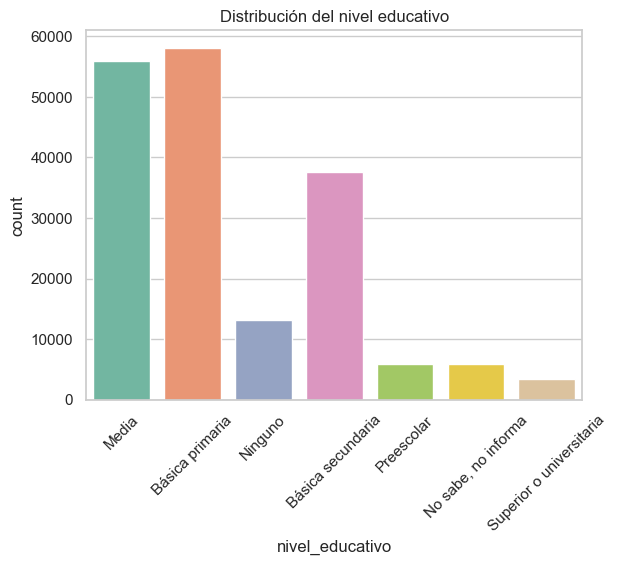

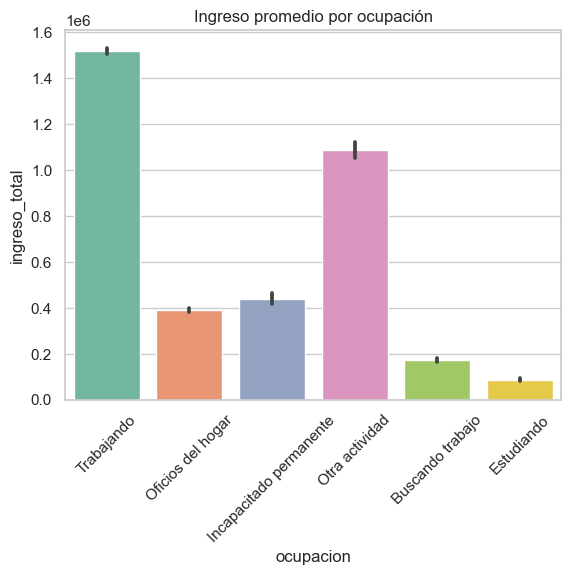

In [46]:
# Countplot de nivel educativo
sns.countplot(x='nivel_educativo', data=data, palette='Set2')
plt.title('Distribución del nivel educativo')
plt.xticks(rotation=45)
plt.show()

# Barplot de ingreso promedio por ocupación
sns.barplot(x='ocupacion', y='ingreso_total', data=data, palette='Set2')
plt.title('Ingreso promedio por ocupación')
plt.xticks(rotation=45)
plt.show()

Respecto a las ocupaciones y el nivel educativo se encuentra una gran parte de la población entre haber terminado solo la educación básica primaria y media. 

Los mayores niveles de ingresos se encuentran en personas que trabajan o se dedican a otra actividad. Dando cuenta de la informalidad que existe en el país a la hora de hablar de empleo. Se encuentra una gran diferencia entre esos niveles de ingresos y los ingresos de personas que trabajan en el hogar o tienen incapacidad permanente.

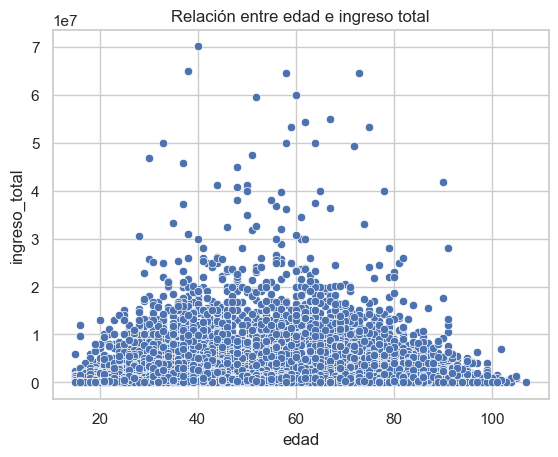

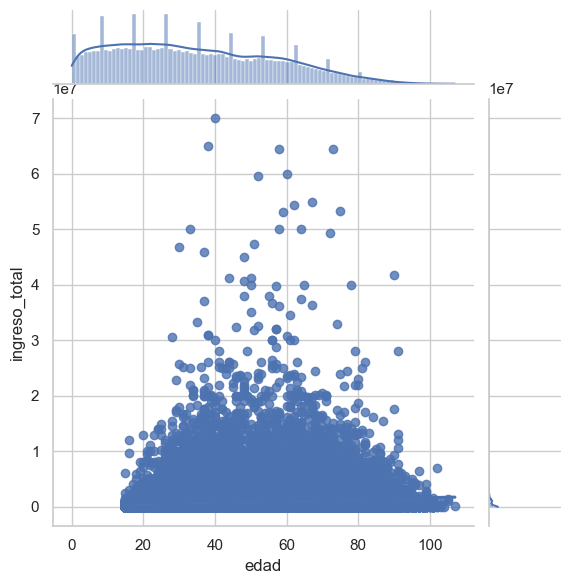

In [47]:
# Scatterplot de edad vs. ingreso total
sns.scatterplot(x='edad', y='ingreso_total', data=data)
plt.title('Relación entre edad e ingreso total')
plt.show()

# Jointplot de edad vs. ingreso total
sns.jointplot(x='edad', y='ingreso_total', data=data, kind="reg")
plt.show()

De manera similar se observa una gran concentración de personas con ingresos menores a 2 millones de pesos. Sin embargo, los outliers pueden llegar hasta 7 millones de pesos

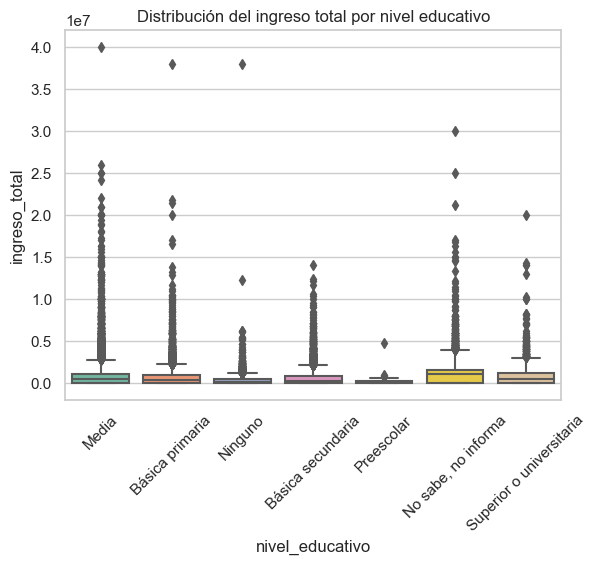

In [48]:
# Boxplot de ingreso total por nivel educativo
sns.boxplot(x='nivel_educativo', y='ingreso_total', data=data, palette='Set2')
plt.title('Distribución del ingreso total por nivel educativo')
plt.xticks(rotation=45)
plt.show()

Se observa gran cantidad de outliers frente a los ingresos por nivel educativo. Los outliers más grandes se encuentran en personas que terminaron la básica primaria o la educación media. 

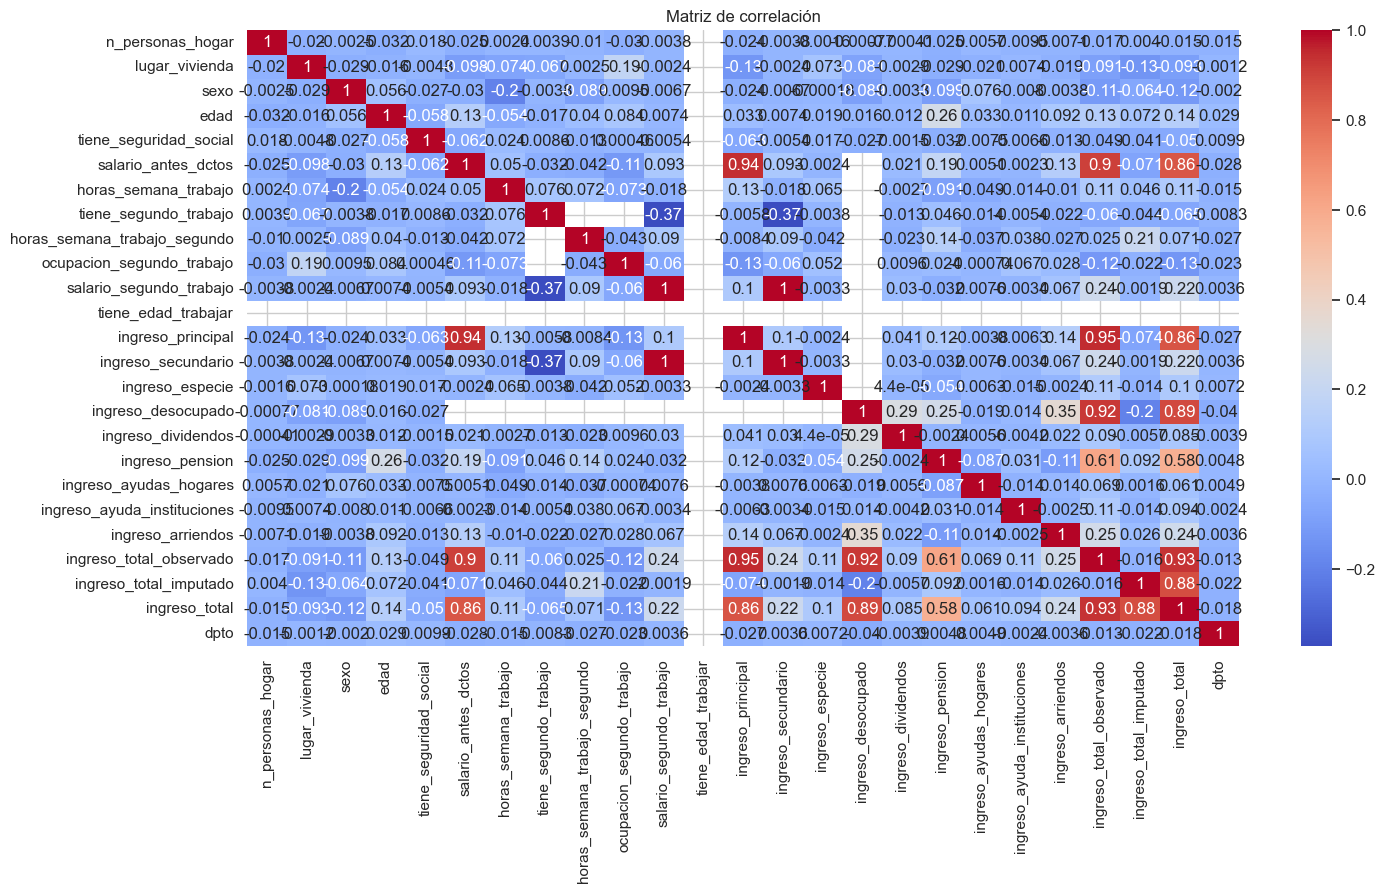

In [50]:
numeric_cols = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Crear el heatmap
plt.figure(figsize=(16, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Se encuentran correlaciones entre las distintas variables referentes a ingresos e ingreso_total. Esto puede deberse a que ingreso_total agrega estas variables. Podemos decidir quedarnos con solo una variable de ingresos.

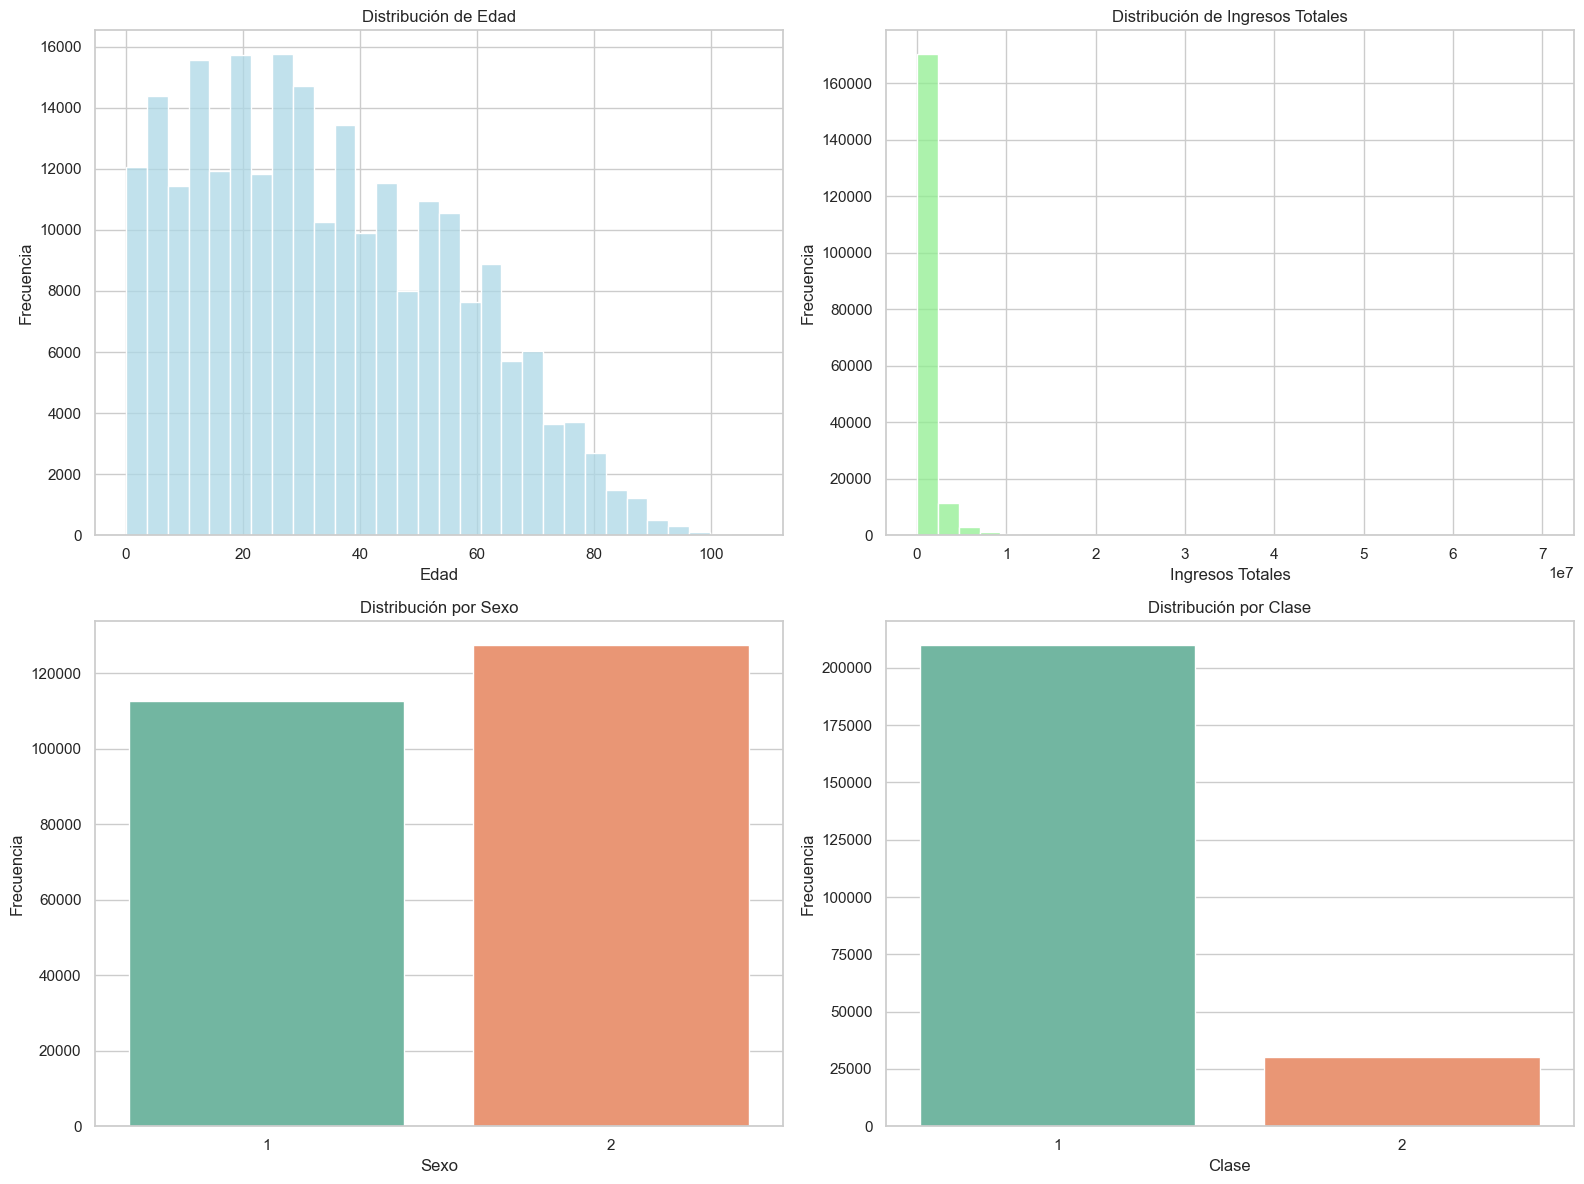

In [51]:
# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(16, 12))

# Gráfico 1: Distribución de edades (p6040)
plt.subplot(2, 2, 1)
sns.histplot(data['edad'], kde=False, color='lightblue', bins=30)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Gráfico 2: Distribución de ingresos totales (ingtot)
plt.subplot(2, 2, 2)
sns.histplot(data['ingreso_total'].dropna(), kde=False, color='lightgreen', bins=30)
plt.title('Distribución de Ingresos Totales')
plt.xlabel('Ingresos Totales')
plt.ylabel('Frecuencia')

# Gráfico 3: Distribución de la variable Sexo
plt.subplot(2, 2, 3)
sns.countplot(x='sexo', data=data, palette='Set2')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Gráfico 4: Distribución de la variable Clase (clase)
plt.subplot(2, 2, 4)
sns.countplot(x='lugar_vivienda', data=data, palette='Set2')
plt.title('Distribución por Clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

* Distribución de Edad: La mayoría de la población se concentra en el rango de 15 a 60 años, con un pico en la adolescencia y otro en la mediana edad.
* Distribución de Ingresos Totales: Existe una gran variabilidad en los ingresos, con muchos valores concentrados en los rangos más bajos y algunos casos con ingresos extremadamente altos.
* Distribución por Sexo: La población está bastante equilibrada entre hombres y mujeres.
* Distribución por Clase: La mayoría de la muestra pertenece a la "Cabecera", que quiere decir que vive en la ciudad, con una menor proporción en el "Resto" (centros poblados y áreas rurales dispersas).

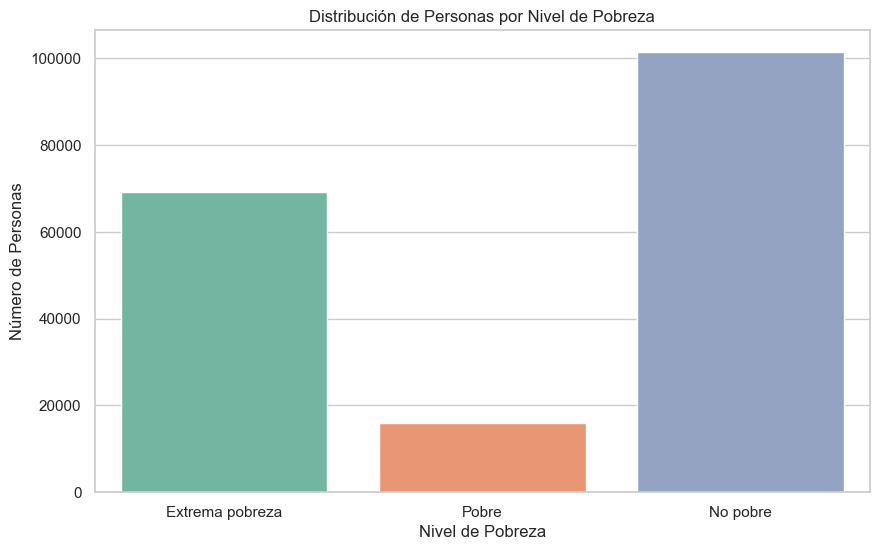

In [52]:
# Niveles de Pobreza:
# Ingreso total: 'ingtot'
# Número de personas en el hogar: 'n_personas_hogar'

# Umbrales Colombia:
# Pobreza extrema: ingreso per cápita < 160.302
# Pobreza: 160.302 <= ingreso per cápita < 351.480
# No pobre: ingreso per cápita >= 351.480

# Calcular el ingreso per cápita
data['ingreso_per_capita'] = data['ingreso_total'] / data['n_personas_hogar']

# Categorizar según niveles de pobreza
data['nivel_pobreza'] = pd.cut(data['ingreso_per_capita'], 
                             bins=[-1, 160302, 351480, float('inf')],
                             labels=['Extrema pobreza', 'Pobre', 'No pobre'])

# Crear gráfico de distribución por nivel de pobreza
plt.figure(figsize=(10, 6))
sns.countplot(x='nivel_pobreza', data=data, palette='Set2')
plt.title('Distribución de Personas por Nivel de Pobreza')
plt.xlabel('Nivel de Pobreza')
plt.ylabel('Número de Personas')
plt.show()

El gráfico muestra la distribución de personas según su nivel de pobreza, con tres categorías principales: Extrema pobreza, Pobre, y No pobre. A partir de este gráfico, se pueden observar las siguientes conclusiones:

**Extrema Pobreza:**
Un número significativo de personas se encuentra en la categoría de "Extrema pobreza". Esto sugiere que una parte considerable de la población vive con ingresos per cápita muy por debajo del umbral necesario para cubrir las necesidades básicas.

**Pobre:**
La categoría "Pobre" tiene una representación menor en comparación con "Extrema pobreza" y "No pobre". Esto podría indicar que, una vez que las personas superan el umbral de extrema pobreza, es menos frecuente que se queden en el rango intermedio antes de pasar a ser considerados "No pobres".

**No Pobre:**
La mayoría de las personas en el conjunto de datos están clasificadas como "No pobre", lo que indica que superan el umbral de 351,480 en términos de ingresos per cápita. Este es el grupo más numeroso, lo que sugiere que, en este conjunto de datos, una gran parte de la población tiene ingresos suficientes para estar fuera de la pobreza según los umbrales establecidos.

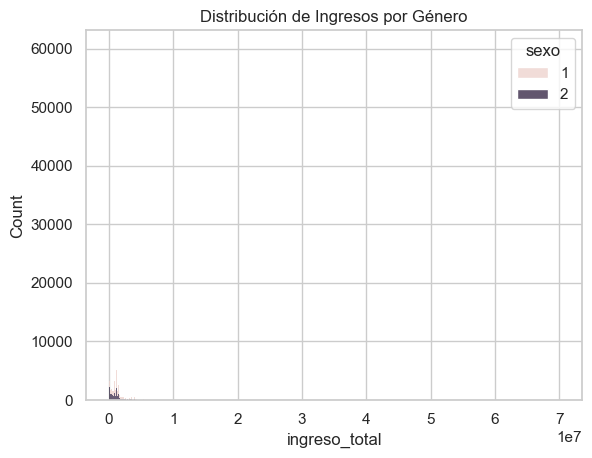

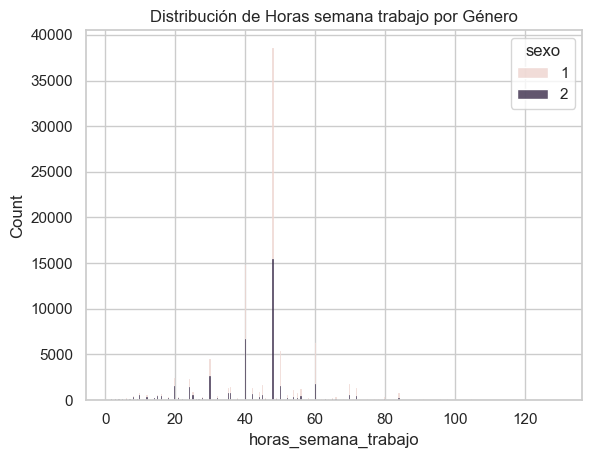

In [53]:
# Histograma de ingresos
sns.histplot(data=data, x='ingreso_total', hue='sexo', multiple='stack')
plt.title('Distribución de Ingresos por Género')
plt.show()

# Histograma de horas semana trabajo
sns.histplot(data=data, x='horas_semana_trabajo', hue='sexo', multiple='stack')
plt.title('Distribución de Horas semana trabajo por Género')
plt.show()

A la hora de visualizar los ingresos y horas que se trabajan en la semana según el género la presencia de datos outliers dificultan la visualización de dichas métricas.

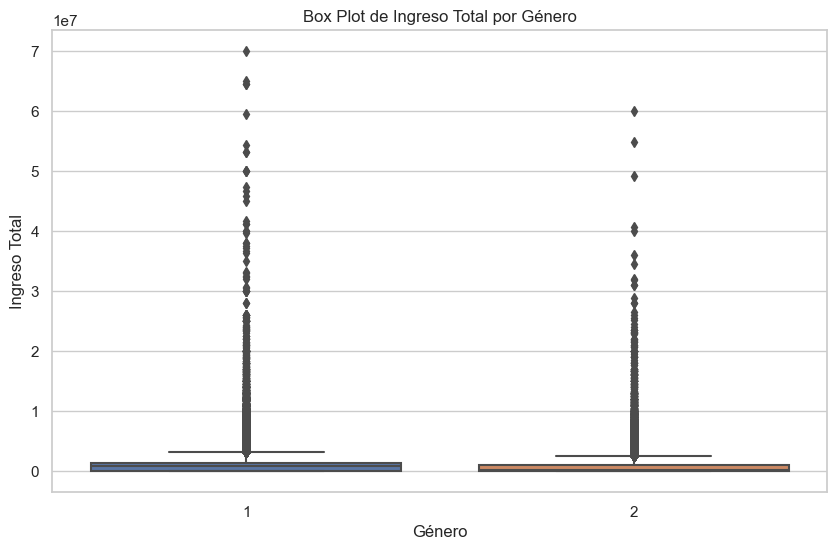

El valor promedio de ingreso total  es: 928032.1132324585
sexo
1    1.143031e+06
2    7.469098e+05
Name: ingreso_total, dtype: float64


In [54]:
# Crear el box plot
plt.figure(figsize=(10, 6))  
sns.boxplot(x='sexo', y='ingreso_total', data=data)

plt.xlabel('Género')
plt.ylabel('Ingreso Total')
plt.title('Box Plot de Ingreso Total por Género')

plt.show() 

promedio_ingtot = data['ingreso_total'].mean()

print(f"El valor promedio de ingreso total  es: {promedio_ingtot}")

# Agrupar por género y calcular el promedio del ingreso total
promedio_por_genero = data.groupby('sexo')['ingreso_total'].mean()

# Mostrar el resultado
print(promedio_por_genero)


En promedio podemos evidenciar  que el salario es de $928.032,11. 

Adicionalmente el promedio entre hombres y mujeres difiere, siendo para los hombres un salario promedio de 1.143.031 pesos y para las mujeres de 746.909 pesos. 

Inicialmente se puede observar la diferencia en promedio del salario por género, siendo en el caso de los hombres el doble de las mujeres.

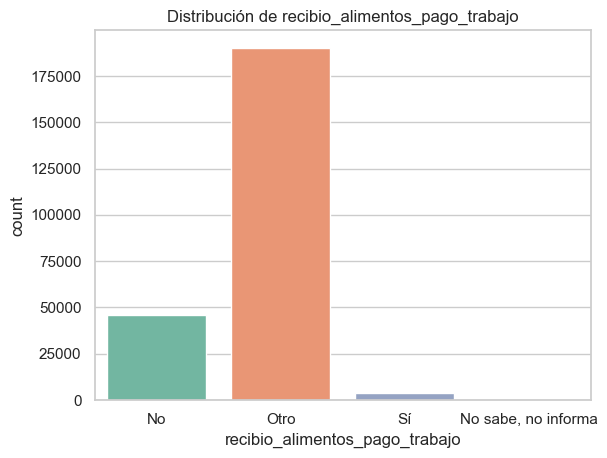

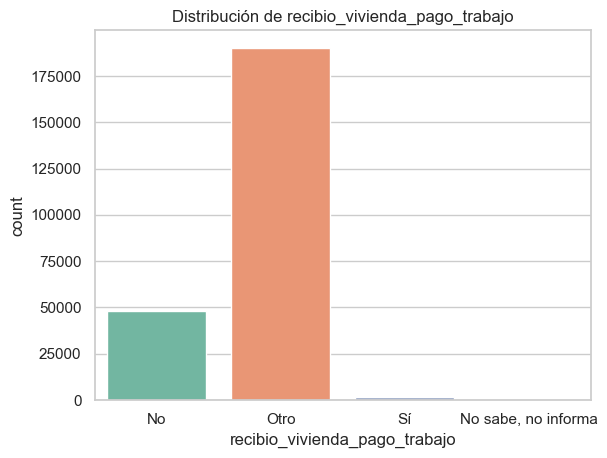

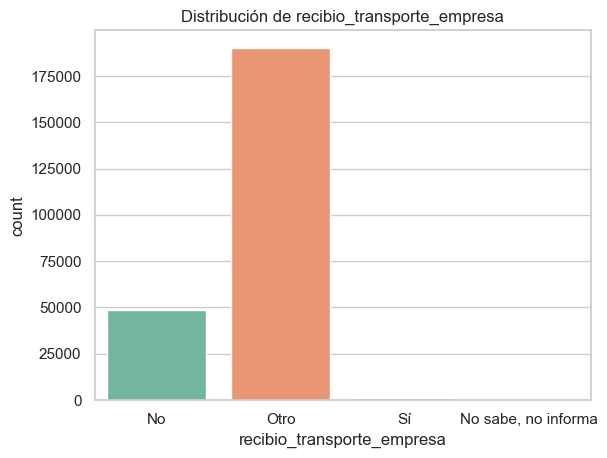

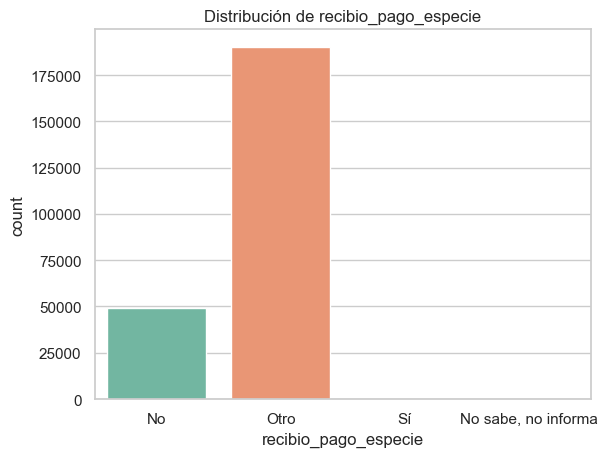

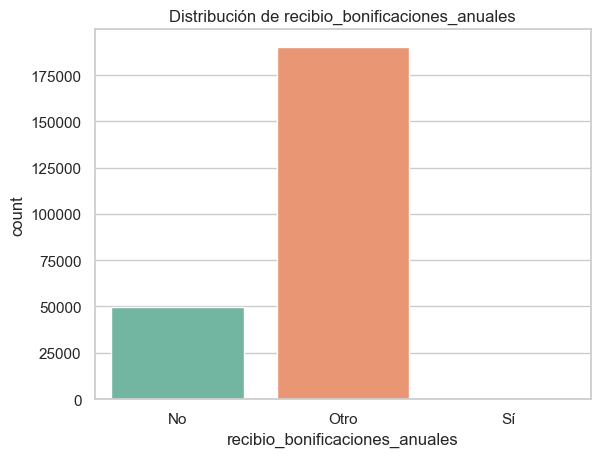

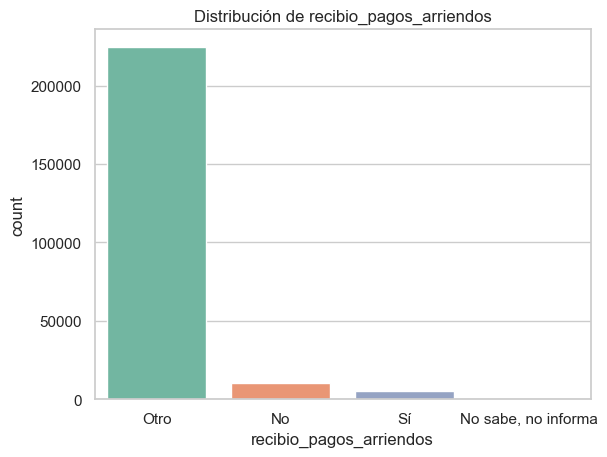

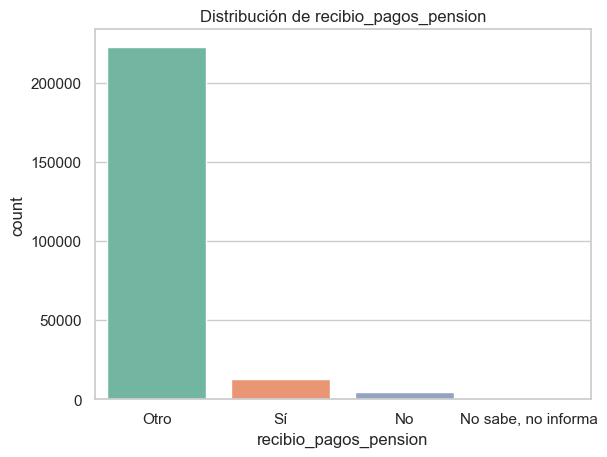

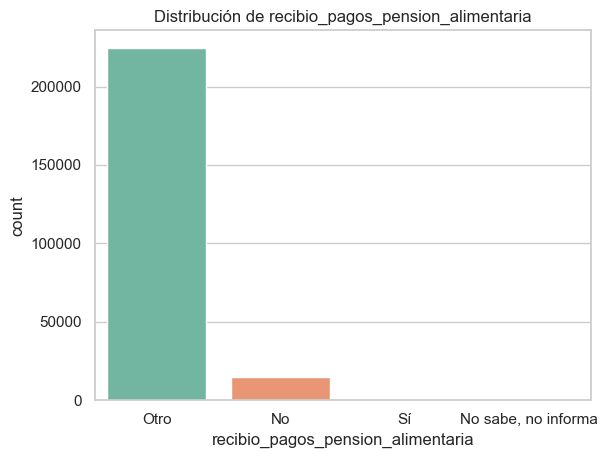

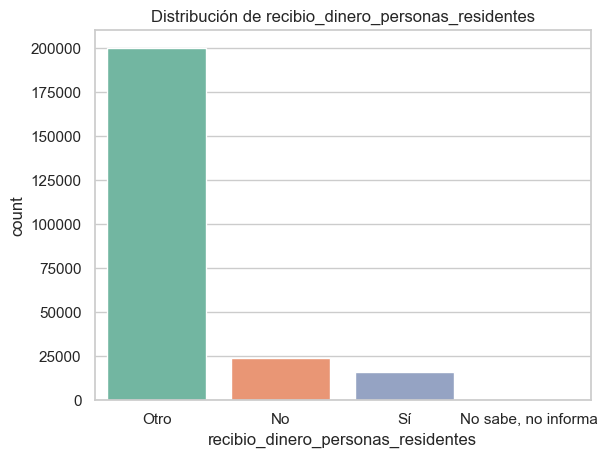

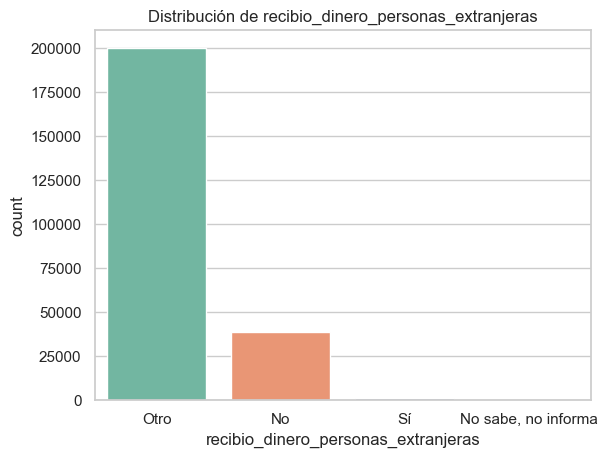

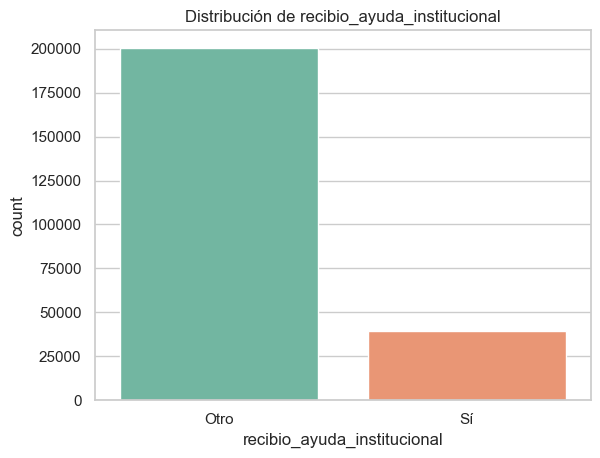

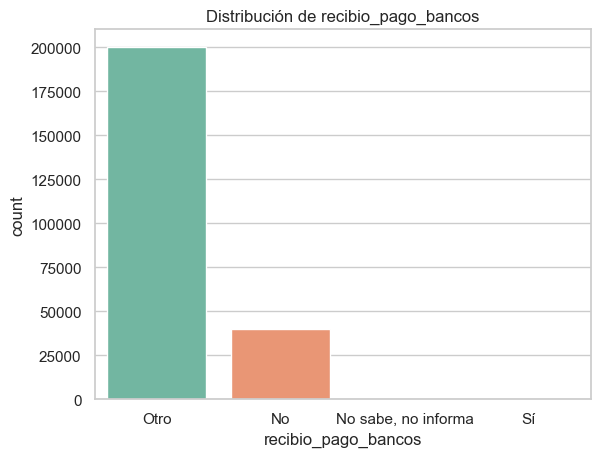

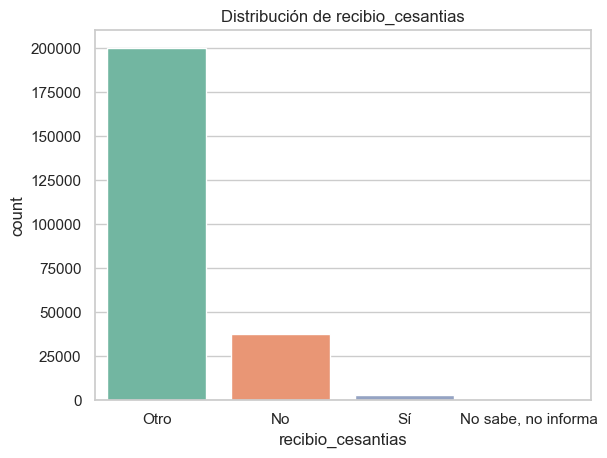

In [55]:
# Seleccionar las columnas que comienzan con "recibio_"
recibio_cols = [col for col in data.columns if col.startswith('recibio_')]

# Crear una función para generar los gráficos
def plot_recibio_cols(df, cols):
    for col in cols:
        sns.countplot(x=col, data=df, palette="Set2")
        plt.title(f'Distribución de {col}')
        plt.show()

# Aplicar la función
plot_recibio_cols(data, recibio_cols)

A la hora de visualizar si las personas reciben algun gato fuera de su salario (por ejemplo, cesantías, pagos por arriendo, beneficios de transporte o vivienda), en la mayoría de casos la respuesta es "Otro". Aunque se trate de una variable de Si o No esto dificulta el análisis. En ninguno de los casos hay más datos de Si.

Esto nos puede llevar a pensar que **normalmente las personas no gozan de ciertos beneficios fuera de su salario.**

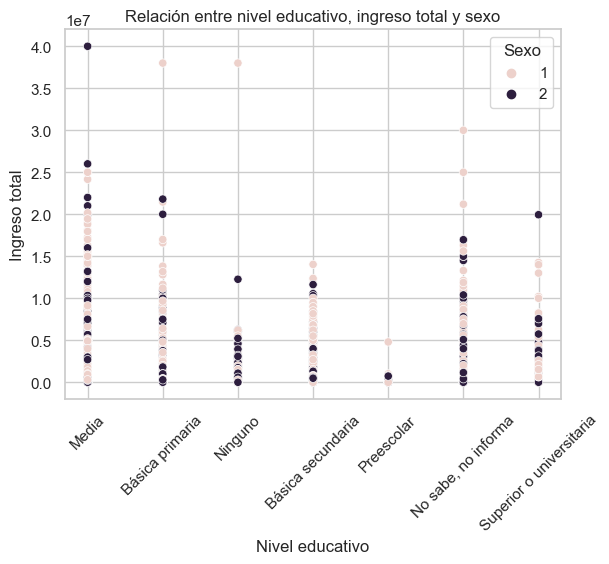

In [56]:
# Diagrama de dispersión con color por sexo
sns.scatterplot(x='nivel_educativo', y='ingreso_total', hue='sexo', data=data)

# Personalización del gráfico
plt.title('Relación entre nivel educativo, ingreso total y sexo')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingreso total')
plt.xticks(rotation=45)
plt.legend(title='Sexo')

plt.show()

Como habíamos visto en puntos anteriores, los hombres tienden a ganar más que las mujeres independientemente de su nivel educativo. Cabe resaltar que se observa que aún con educación superior o universitaria, **las personas que mas ganan terminaron la eduación media y básica primaria.** 

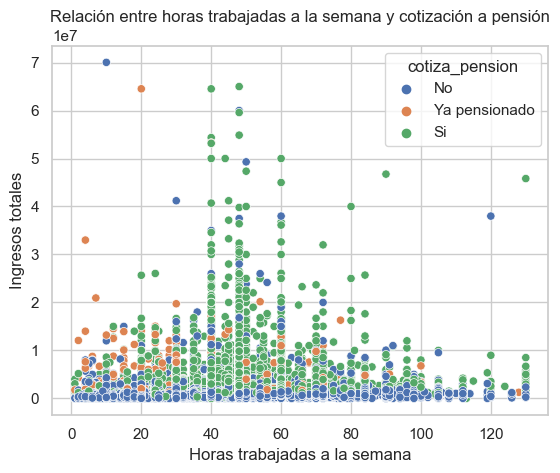

In [59]:
# Diagrama de dispersión entre horas trabajadas a la semana y cotización a pensión
sns.scatterplot(x='horas_semana_trabajo', y='ingreso_total', hue='cotiza_pension', data=data)

# Personalización del gráfico
plt.title('Relación entre horas trabajadas a la semana y cotización a pensión')
plt.xlabel('Horas trabajadas a la semana')
plt.ylabel('Ingresos totales')

plt.show()

Finalmente, se quiere buscar una relación entre la cantidad de horas trabajadas a la semana y los ingresos totales. Divididos en si la persona cotiza pensión (o si ya es pensionado). Se observa que la mayoría de personas con ingresos más bajos no cotiza pensión y que los ingresos más altos están relacionados a horas en la semana por debajo de 50. Siendo los más altos con menos de 20 horas a la semana. 

Cabe resaltar que se observan también muchas personas pensionads que siguen trabajando. 

## Conclusiones

- Existen grandes diferencias entre los niveles de ingresos. La mayoría de personas (quartil 75%) se encuentra por debajo de 1'200.000 pesos en ingresos al mes. 
- Los salarios más altos se encuentran en más de 7 millones de pesos. Pero están por encima del 90% de la población
- Existen diferencias entre el salario de hombre y mujeres. Esto puede deberse a la diferencia entre los niveles de ingresos según ocupación, siendo los oficios de hogar con una diferencia de más del 50% en comparación con los trabajos formales
- Se observa gran cantidad de informalidad
- La mayoría de personas son clasificadas como No pobres, pero se encuentra una gran cantidad de personas en pobreza extrema.
- A pesar de cumplir con una educación superior. Los niveles más altos de ingresos se encuentran en personas que terminaron la básica primaria y educación media. 
- El número de horas a la semana puede ser mayor a 120. Lo que podría indicar tiempos de trabajo de más de 17h al día en promedio.
- Normalmente las personas no reciben beneficios adicionales en su trabajo además del salario.
- Gran cantidad de pensionados continúa trabajando. 